<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="380" alt="Skills Network Logo">
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2024-08-06 11:46:47--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104, 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite.18’

m4_survey_data.sqli 100%[===================>]  34.98M  29.3MB/s    in 1.2s    

2024-08-06 11:46:49 (29.3 MB/s) - ‘m4_survey_data.sqlite.18’ saved [36679680/36679680]



Connect to the database.


In [2]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [3]:
import matplotlib.pyplot as plt

import pandas as pd

%pip install seaborn
import seaborn as sns

Note: you may need to restart the kernel to use updated packages.


In [4]:
print(sns.__version__)

0.11.2


In [5]:
%pip install seaborn==0.11.2
# to be able to move the legend with sns.
# Run the script once and then restart the kernel and run all the cells. 

Note: you may need to restart the kernel to use updated packages.


In [6]:
print(sns.__version__)

0.11.2


In [7]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [8]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
df_tables = pd.read_sql_query(QUERY,conn)

df_tables

,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [9]:
QUERY = """
SELECT Age,COUNT(*) as Count
FROM master
GROUP BY Age
ORDER BY Age
"""
pd.read_sql_query(QUERY,conn)

,Age,Count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## Demo: How to describe a table


In [10]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


In [11]:
QUERY = """
SELECT ConvertedComp
FROM master
"""
df = pd.read_sql_query(QUERY,conn)

df.head()

,ConvertedComp
0,61000.0
1,95179.0
2,90000.0
3,455352.0
4,65277.0


Text(0.5, 1.0, 'Distribution of the ConvertedComp')

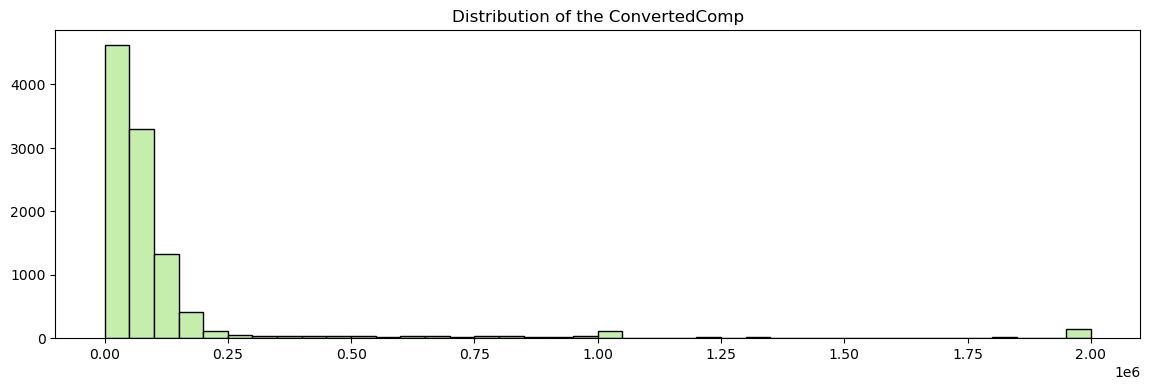

In [12]:
#sns.set_theme(style="darkgrid")

plt.figure(figsize=(14, 4))
plt.hist(df['ConvertedComp'], bins=40, color="#C5EDAC", edgecolor="#000000")
plt.title("Distribution of the ConvertedComp")

### Box Plots


Plot a box plot of `Age.`


In [13]:
QUERY = """
SELECT Age
FROM master
"""
df = pd.read_sql_query(QUERY,conn)

df.head()

,Age
0,22.0
1,23.0
2,28.0
3,26.0
4,29.0


/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Key Statistical Measures for Age')

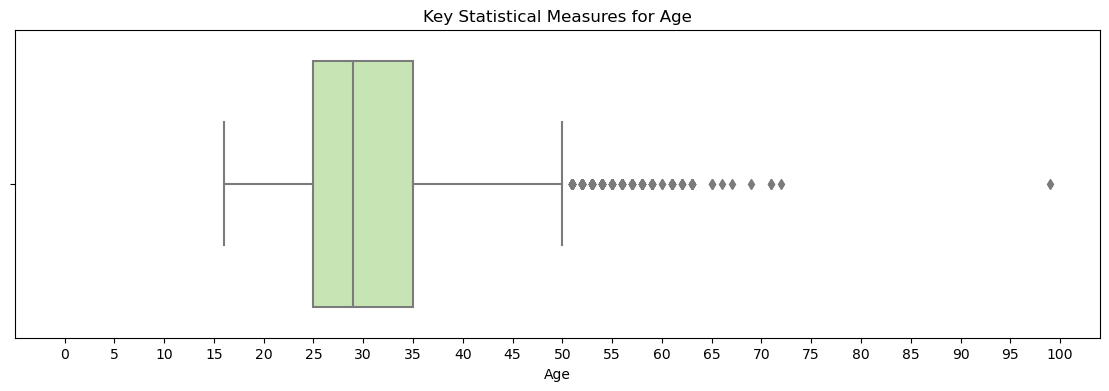

In [14]:
max_range = int(df['Age'].max())
step = 5

plt.figure(figsize=(14, 4))
graph_box = sns.boxplot(df['Age'], orient="h", color="#C5EDAC")
graph_box.set_xlim(-5, max_range + step)
graph_box.set_xticks(range(0, max_range + step, step))
plt.title("Key Statistical Measures for Age")

## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


In [15]:
QUERY = """
SELECT Age, WorkWeekHrs
FROM master
"""
df = pd.read_sql_query(QUERY,conn)

df.head()

,Age,WorkWeekHrs
0,22.0,80.0
1,23.0,32.0
2,28.0,40.0
3,26.0,40.0
4,29.0,45.0


Text(0.5, 1.0, 'Relationship between Age and Work Week Hours')

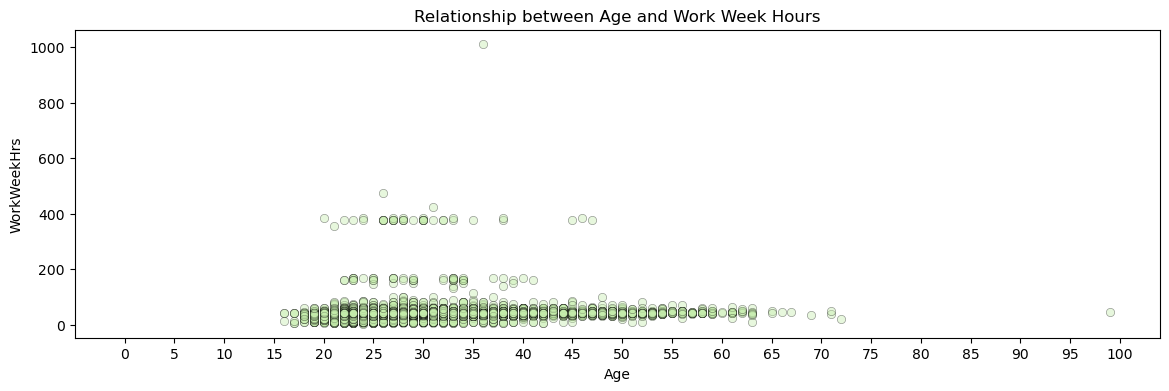

In [16]:
max_range = int(df['Age'].max())
step = 5

plt.figure(figsize=(14, 4))
graph_scatter = sns.scatterplot(x=df['Age'], y=df['WorkWeekHrs'], alpha=0.4, color="#C5EDAC", edgecolor="#000000")
graph_scatter.set_xlim(-5, max_range + step)
graph_scatter.set_xticks(range(0, max_range + step, step))
plt.title("Relationship between Age and Work Week Hours")

### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


In [17]:
QUERY = """
SELECT Age, WorkWeekHrs, CodeRevHrs
FROM master
"""
df = pd.read_sql_query(QUERY,conn)

df.head()

,Age,WorkWeekHrs,CodeRevHrs
0,22.0,80.0,NaN
1,23.0,32.0,12.0
2,28.0,40.0,5.0
3,26.0,40.0,NaN
4,29.0,45.0,5.0


Text(0.5, 1.0, 'Relationship between CodeRevHrs, WorkWeekHrs, and Age')

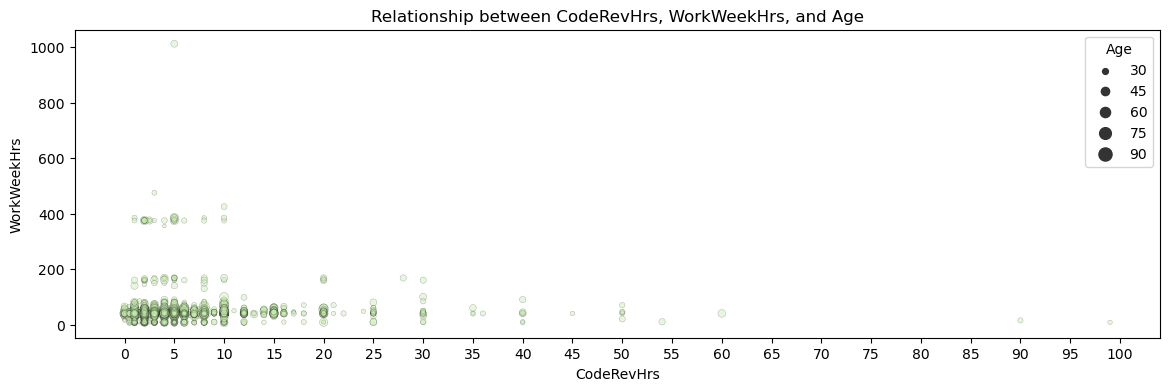

In [18]:
min_range = int(df['CodeRevHrs'].min())
max_range = int(df['CodeRevHrs'].max())
step = 5

plt.figure(figsize=(14, 4))
graph_bubble = sns.scatterplot(x=df['CodeRevHrs'], y=df['WorkWeekHrs'], alpha=0.4, color="#C5EDAC", edgecolor="#000000", size=df['Age'], sizes=(1, 100))
graph_bubble.set_xlim(min_range - step, max_range + step)
graph_bubble.set_xticks(range(min_range, max_range + step, step))
plt.title("Relationship between CodeRevHrs, WorkWeekHrs, and Age")

## Visualizing composition of data


### Pie Charts


top 5 databases that respondents wish to learn next yearCreate a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


In [19]:
QUERY = """
SELECT *, COUNT(*) AS Count
FROM DatabaseDesireNextYear
GROUP BY DatabaseDesireNextYear
ORDER BY Count DESC
LIMIT 5
"""
df = pd.read_sql_query(QUERY,conn)

df

,Respondent,DatabaseDesireNextYear,Count
0,9,PostgreSQL,4328
1,16,MongoDB,3649
2,9,Redis,3331
3,4,MySQL,3281
4,16,Elasticsearch,2856


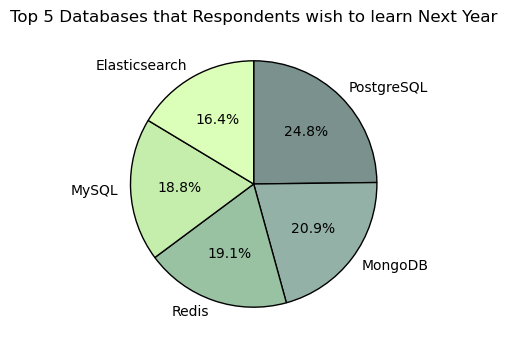

In [20]:
number = df['Count']
labels = df['DatabaseDesireNextYear']
colors = ["#7A918D","#93B1A7","#99C2A2","#C5EDAC", "#DBFEB8"]

plt.figure(figsize=(4,4))
plt.pie(number, labels=labels, autopct='%1.1f%%', startangle=90, counterclock=False, colors=colors, wedgeprops = {"edgecolor" : "#000000"})
plt.title("Top 5 Databases that Respondents wish to learn Next Year")
plt.show()

In [21]:
QUERY = """
SELECT *, COUNT(*) AS Count
FROM LanguageDesireNextYear
GROUP BY LanguageDesireNextYear
ORDER BY Count DESC
"""
df = pd.read_sql_query(QUERY,conn)

df.index[df['LanguageDesireNextYear'] == "Python"] + 1

Int64Index([3], dtype='int64')

In [22]:
QUERY = """
SELECT *, COUNT(*) AS Count
FROM LanguageWorkedWith
GROUP BY LanguageWorkedWith
ORDER BY Count DESC
"""
df = pd.read_sql_query(QUERY,conn)

df[df['LanguageWorkedWith'] == "SQL"]

,Respondent,LanguageWorkedWith,Count
2,4,SQL,7106


In [23]:
QUERY = """
SELECT DatabaseWorkedWith, COUNT(*) As Aggregation
FROM (SELECT *, COUNT(*) AS Count FROM DatabaseWorkedWith GROUP BY Respondent HAVING Count = 1)
GROUP BY DatabaseWorkedWith
"""
df = pd.read_sql_query(QUERY,conn)

df[df['DatabaseWorkedWith'] == "MySQL"]

,DatabaseWorkedWith,Aggregation
8,MySQL,474


### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


In [24]:
QUERY = """
SELECT WorkWeekHrs, CodeRevHrs, Age
FROM master
WHERE Age BETWEEN 30 AND 35
ORDER BY Age
"""
df = pd.read_sql_query(QUERY,conn)

df.head()

,WorkWeekHrs,CodeRevHrs,Age
0,40.0,5.0,30.0
1,50.0,4.0,30.0
2,45.0,8.0,30.0
3,40.0,4.0,30.0
4,40.0,5.0,30.0


Text(0.5, 1.0, 'Median of WorkWeekHrs and CodeRevHrs for the 30 - 35 age group')

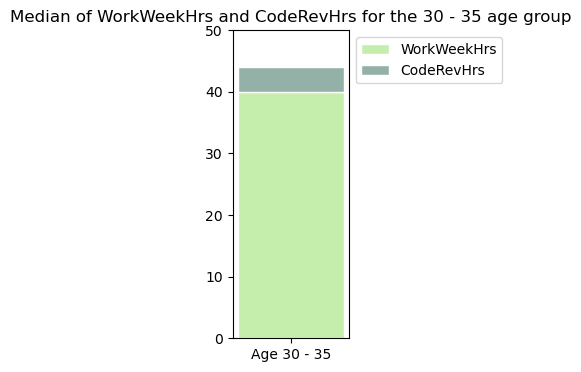

In [25]:
workweekhrs_median = df['WorkWeekHrs'].median()
coderevhrs_median = df['CodeRevHrs'].median()

plt.rcParams['figure.figsize'] = [1.5,4]
fig, ax = plt.subplots()
ax.bar("Age 30 - 35", workweekhrs_median, label='WorkWeekHrs', color="#C5EDAC", edgecolor="#FFFFFF")
ax.bar("Age 30 - 35", coderevhrs_median, bottom=workweekhrs_median, label='CodeRevHrs', color="#93B1A7", edgecolor="#FFFFFF")
ax.set_ylim(0,50)
ax.legend()
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title("Median of WorkWeekHrs and CodeRevHrs for the 30 - 35 age group")

## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


In [26]:
QUERY = """
SELECT ConvertedComp, Age
FROM master
WHERE Age BETWEEN 45 AND 60
ORDER BY Age
"""
df = pd.read_sql_query(QUERY,conn)

df.head()

,ConvertedComp,Age
0,72522.0,45.0
1,54876.0,45.0
2,185000.0,45.0
3,165000.0,45.0
4,130000.0,45.0


In [27]:
convertedcomp_median = df.groupby('Age')['ConvertedComp'].median().reset_index()
convertedcomp_median

,Age,ConvertedComp
0,45.0,90330.0
1,46.0,91593.0
2,47.0,91606.0
3,48.0,105750.0
4,49.0,85248.0
5,50.0,95000.0
6,51.0,100000.0
7,52.0,105500.0
8,53.0,100463.0
9,54.0,121000.0


Text(0.5, 1.0, 'Median of ConvertedComp for each Age between 45 and 60')

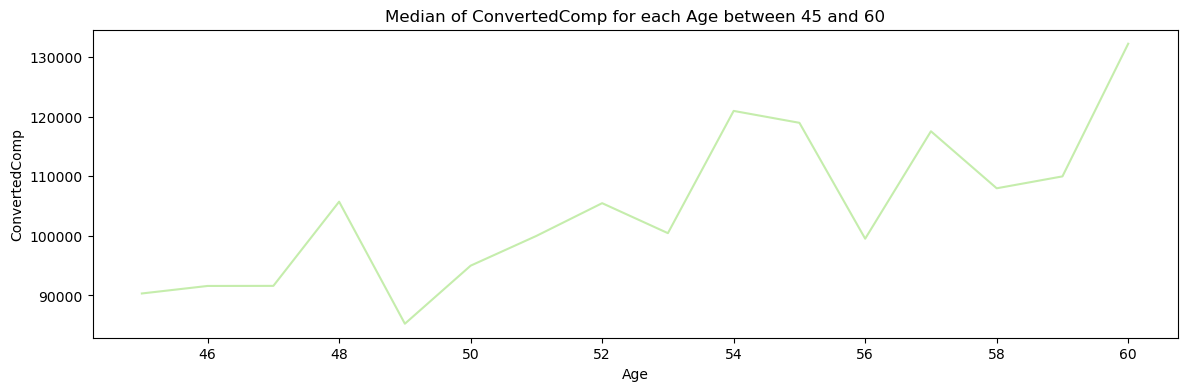

In [28]:
plt.figure(figsize=(14,4))
sns.lineplot(x=convertedcomp_median['Age'], y=convertedcomp_median['ConvertedComp'], color="#C5EDAC")
plt.title("Median of ConvertedComp for each Age between 45 and 60")

In [29]:
QUERY = """
SELECT ConvertedComp, Age
FROM master
WHERE Age BETWEEN 25 AND 30
ORDER BY Age
"""
df = pd.read_sql_query(QUERY,conn)

df.head()

,ConvertedComp,Age
0,7696.0,25.0
1,16788.0,25.0
2,66750.0,25.0
3,7556.0,25.0
4,960000.0,25.0


In [30]:
convertedcomp_median = df.groupby('Age')['ConvertedComp'].median().reset_index()
convertedcomp_median

,Age,ConvertedComp
0,25.0,39920.0
1,26.0,43834.0
2,27.0,49620.0
3,28.0,51559.0
4,29.0,55674.0
5,30.0,56376.0


Text(0.5, 1.0, 'Median of ConvertedComp for each Age between 25 and 30')

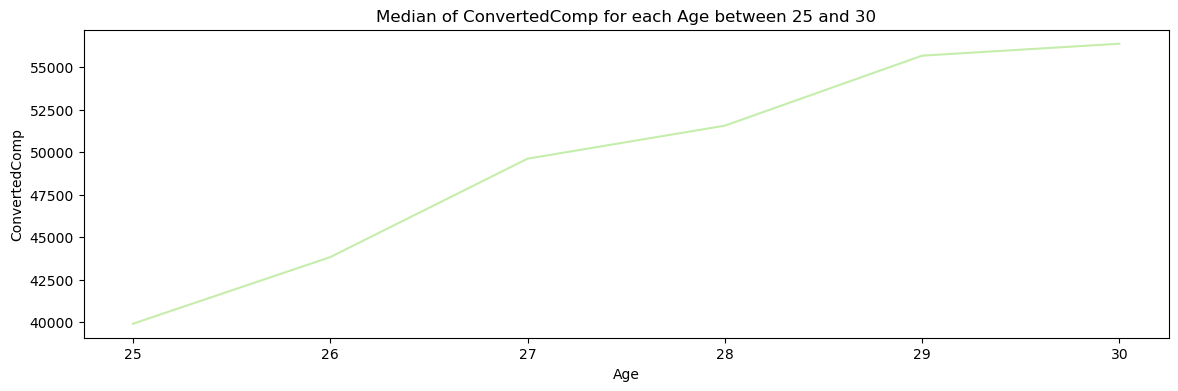

In [31]:
plt.figure(figsize=(14,4))
sns.lineplot(x=convertedcomp_median['Age'], y=convertedcomp_median['ConvertedComp'], color="#C5EDAC")
plt.title("Median of ConvertedComp for each Age between 25 and 30")

In [32]:
QUERY = """
SELECT *, COUNT(*) AS Count
FROM DevType
GROUP BY DevType
ORDER BY Count DESC
"""
df = pd.read_sql_query(QUERY,conn)

df

,Respondent,DevType,Count
0,4,"Developer, full-stack",6928
1,9,"Developer, back-end",6290
2,9,"Developer, front-end",3920
3,13,"Developer, desktop or enterprise applications",2575
4,13,"Developer, mobile",1959
5,9,DevOps specialist,1639
6,9,Database administrator,1413
7,13,System administrator,1202
8,20,Designer,988
9,9,"Developer, QA or test",911


### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


In [33]:
QUERY = """
SELECT MainBranch, COUNT(*) AS Frequency
FROM master
GROUP BY MainBranch
"""
df = pd.read_sql_query(QUERY,conn)

df.head()

,MainBranch,Frequency
0,I am a developer by profession,10618
1,"I am not primarily a developer, but I write co...",780


Text(0.5, 1.0, 'Number of Frequency by MainBranch')

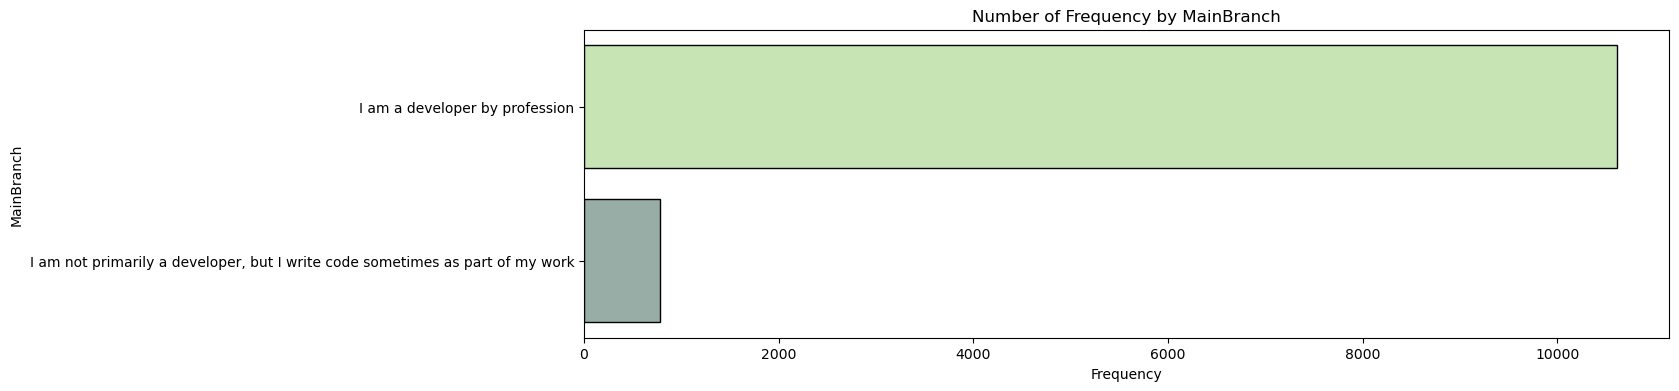

In [34]:
plt.figure(figsize=(14,4))
sns.barplot(x=df['Frequency'], y=df['MainBranch'], orient="h", palette=["#C5EDAC", "#93B1A7"], edgecolor="#000000")
plt.title("Number of Frequency by MainBranch")

Close the database connection.


In [35]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).


<!--## Change Log


<!--| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |--!>
